In [2]:
import h5py
import numpy as np
import pickle

# Make the Dataset from Window
- Let's challenge model with smaller and smaller window

# Load the v.c. 1/3 window hdf5 file

In [12]:
train_X = np.zeros((7856, 200, 200, 1)); train_Y = np.zeros((7856, 2))
val_X = np.zeros((1680, 200, 200, 1)); val_Y = np.zeros((1680, 2))
test_X = np.zeros((1680, 200, 200, 1)); test_Y = np.zeros((1680, 2))

In [13]:
dir = r'C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized'

with open(dir + r"\index.pickle", 'rb') as file:
    idx = pickle.load(file)

In [14]:
hdf5_dir = "C:/Users/bono2/Desktop/Pitching Airfoil/dataset/window/window_vertical_concat_dataset.hdf5"
file = h5py.File(hdf5_dir, 'r')

for i, index in zip(range(train_X.shape[0]), idx['train']):
    train_X[i] = file['u'][index].reshape(200, 200, 1)
    train_Y[i] = file['label'][index]

for i, index in zip(range(val_X.shape[0]), idx['val']):
    val_X[i] = file['u'][index].reshape(200, 200, 1)
    val_Y[i] = file['label'][index]
    
for i, index in zip(range(test_X.shape[0]), idx['test']):
    test_X[i] = file['u'][index].reshape(200, 200, 1)
    test_Y[i] = file['label'][index]

## Transformation to 1/4
- It should be 150 x 150

In [15]:
train_X = np.concatenate((train_X[:, 12:87, 49:199], train_X[:, 112:187, 49:199]), axis = 1)
val_X = np.concatenate((val_X[:, 12:87, 49:199], val_X[:, 112:187, 49:199]), axis = 1)
test_X = np.concatenate((test_X[:, 12:87, 49:199], test_X[:, 112:187, 49:199]), axis = 1)

In [16]:
print(train_X.shape, val_X.shape, test_X.shape)

(7856, 150, 150, 1) (1680, 150, 150, 1) (1680, 150, 150, 1)


# Zero Centering

In [17]:
# Get mean for zero centering
mean = np.mean(train_X, axis = 0)
train_X -= mean
val_X -= mean
test_X -= mean

# Min-Max Scaling

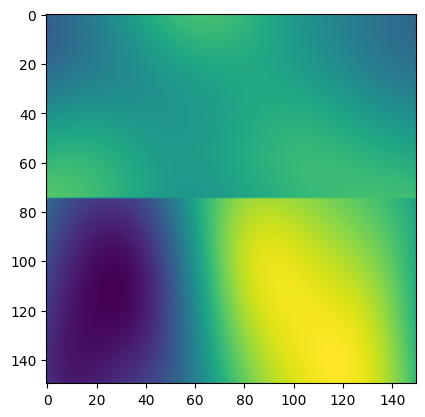

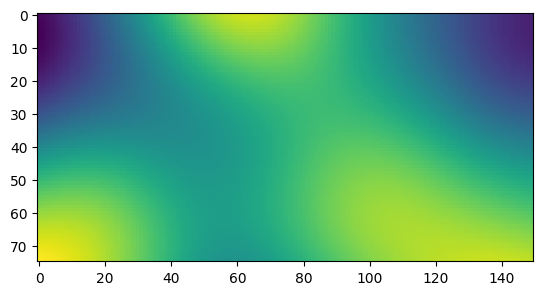

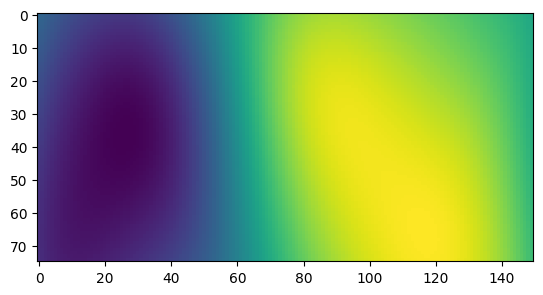

In [27]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0,:,:,:])
plt.show()
plt.imshow(train_X[0, 0:75, :, :])
plt.show()
plt.imshow(train_X[0, 75:150, :, :])
plt.show()

In [28]:
train_ux = train_X[:,0:75,:,:]; train_uy = train_X[:,75:150,:,:]
val_ux = val_X[:,0:75,:,:]; val_uy = val_X[:,75:150,:,:]
test_ux = test_X[:,0:75,:,:]; test_uy = test_X[:,75:150,:,:]

ux_max = 0; ux_min = 10000; uy_max = 0; uy_min = 10000

for ux in train_ux:
    M = np.max(ux); m = np.min(ux)
    if ux_max < M:
        ux_max = M
    elif ux_min > m:
        ux_min = m
   
for uy in train_uy:
    M = np.max(uy); m = np.min(uy)
    if uy_max < M:
        uy_max = M
    if uy_min > m:
        uy_min = m
        
print(ux_max, uy_max, ux_min, uy_min)
ux_range = ux_max - ux_min
uy_range = uy_max - uy_min

train_ux /= ux_range; train_uy /= uy_range
val_ux /= ux_range; val_uy /= uy_range
test_ux /= ux_range; test_uy /= uy_range

0.20410246601323845 0.3936119030278132 -0.22447211290733238 -0.4121790080400961


In [29]:
for x, y, i in zip(train_ux, train_uy, range(len(train_uy))):
    train_X[i,0:75,:,:] = x
    train_X[i,75:150,:,:] = y
for x, y, i in zip(val_ux, val_uy, range(len(val_uy))):
    val_X[i,0:75,:,:] = x
    val_X[i,75:150,:,:] = y
for x, y, i  in zip(test_ux, test_uy, range(len(val_uy))):
    test_X[i,0:75,:,:] = x
    test_X[i,75:150,:,:] = y

# Shuffle & Save the Data

In [30]:
save_dir =  r'C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized\one fourth'

In [31]:
np.save(save_dir + r"\train_X.npy", train_X); np.save(save_dir + r"\train_Y.npy", train_Y)
np.save(save_dir + r"\val_X.npy", val_X); np.save(save_dir + r"\val_Y.npy", val_Y)
np.save(save_dir + r"\test_X.npy", test_X); np.save(save_dir + r"\test_Y.npy", test_Y)